## PowerPulse_ Household Energy Usage Forecast

In [6]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00235/household_power_consumption.zip

Archive:  /content/household_power_consumption.zip
  inflating: household_power_consumption.txt  


In [ ]:
!unzip /content/household_power_consumption.zip

In [7]:
import pandas as pd

In [8]:
data=pd.read_csv('/content/household_power_consumption.txt',delimiter=";")
data.head(5)

<ipython-input-8-0111137ec181>:1: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv('/content/household_power_consumption.txt',delimiter=";")


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


In [10]:
data['Global_active_power'] = pd.to_numeric(data['Global_active_power'], errors='coerce')
data['Global_reactive_power'] = pd.to_numeric(data['Global_reactive_power'], errors='coerce')
data['Voltage'] = pd.to_numeric(data['Voltage'], errors='coerce')
data['Global_intensity'] = pd.to_numeric(data['Global_intensity'], errors='coerce')
data['Sub_metering_1'] = pd.to_numeric(data['Sub_metering_1'], errors='coerce')
data['Sub_metering_2'] = pd.to_numeric(data['Sub_metering_2'], errors='coerce')
data['Date'] = pd.to_datetime(data['Date'], format="%d/%m/%Y",errors='coerce')
data['Time'] = pd.to_datetime(data['Time'], format="%H:%M:%S",errors='coerce').dt.time
#data['Time'] = pd.to_timedelta(data['Time'].astype(str))

In [11]:
data.describe()

,Date,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2075259,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,2008-12-05 19:13:27.255191040,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
min,2006-12-16 00:00:00,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,2007-12-12 00:00:00,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2008-12-06 00:00:00,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,2009-12-01 00:00:00,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,2010-11-26 00:00:00,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01
std,NaN,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Date                   datetime64[ns]
 1   Time                   object        
 2   Global_active_power    float64       
 3   Global_reactive_power  float64       
 4   Voltage                float64       
 5   Global_intensity       float64       
 6   Sub_metering_1         float64       
 7   Sub_metering_2         float64       
 8   Sub_metering_3         float64       
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 142.5+ MB


In [13]:
data.isnull().sum() #find number of null values
#data.loc[data['Global_active_power'].isnull()]

,0
Date,0
Time,0
Global_active_power,25979
Global_reactive_power,25979
Voltage,25979
Global_intensity,25979
Sub_metering_1,25979
Sub_metering_2,25979
Sub_metering_3,25979


In [14]:
data.dropna(inplace=True) #removed the null values

In [15]:
data.duplicated().sum() #checking any duplicate values

np.int64(0)

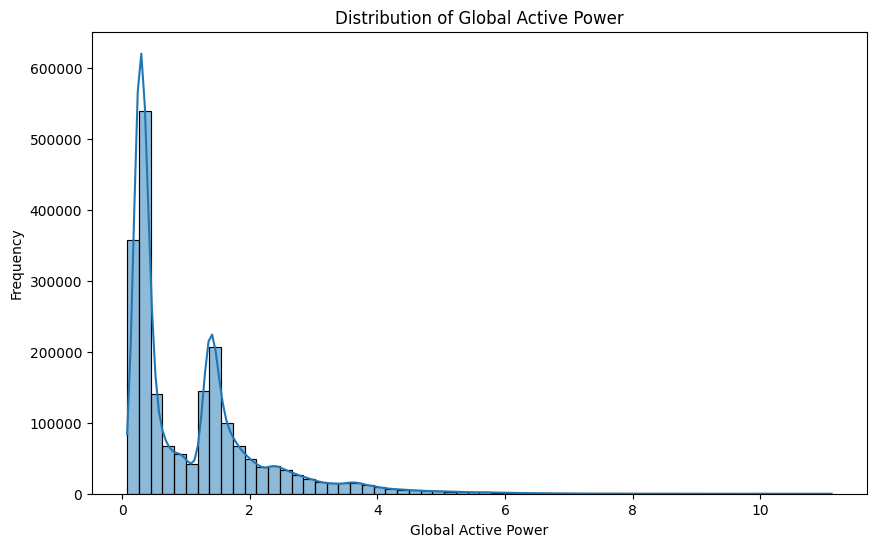

In [16]:

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame

plt.figure(figsize=(10, 6))
sns.histplot(data['Global_active_power'], bins=60, kde=True)
plt.title('Distribution of Global Active Power')
plt.xlabel('Global Active Power')
plt.ylabel('Frequency')
plt.show()


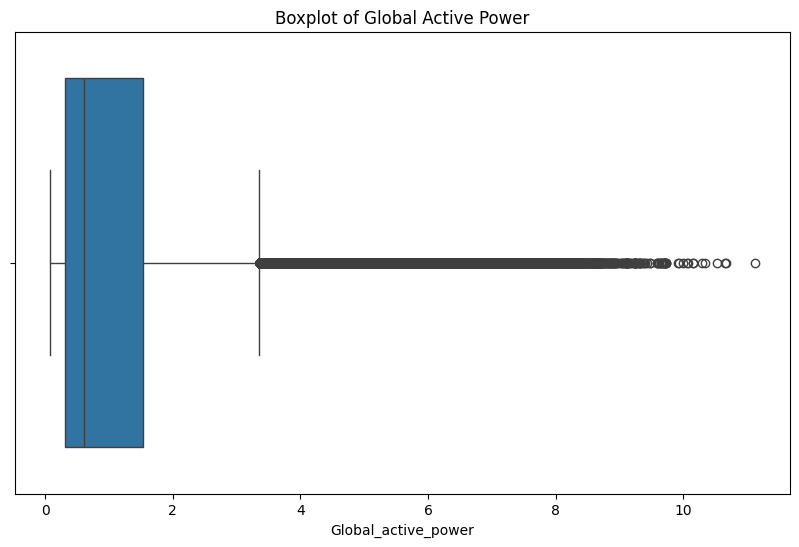

In [17]:

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Global_active_power'])
plt.title('Boxplot of Global Active Power')
#plt.xlabel('Global Active Power')
plt.show()


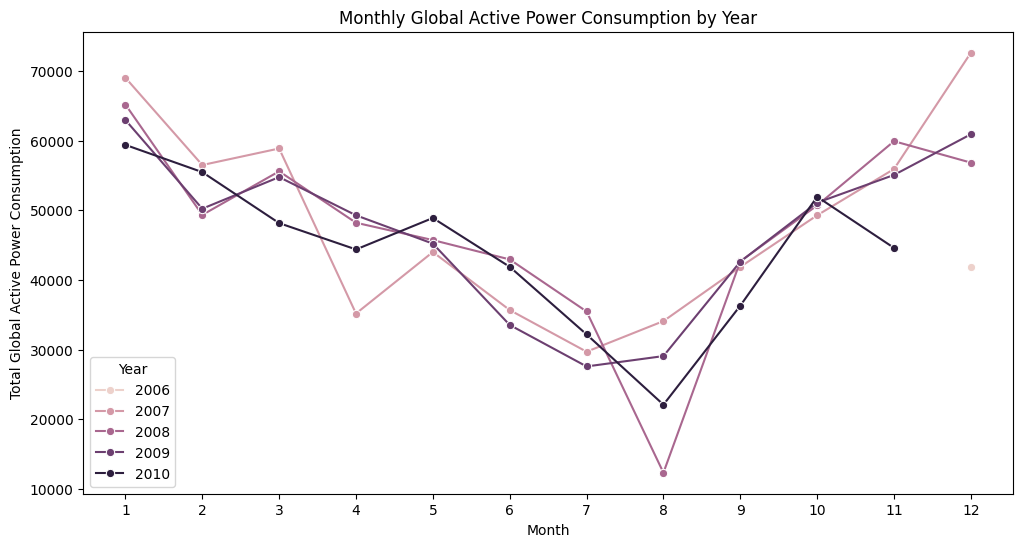

In [18]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Extract year and month
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month

# Group data by year and month, and calculate the sum of 'Global_active_power'
monthly_consumption = data.groupby(['Year', 'Month'])['Global_active_power'].sum().reset_index()

# Create the plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Global_active_power', hue='Year', data=monthly_consumption, marker='o')
plt.xlabel('Month')
plt.ylabel('Total Global Active Power Consumption')
plt.title('Monthly Global Active Power Consumption by Year')
plt.xticks(range(1, 13))
plt.legend(title='Year')
plt.show()


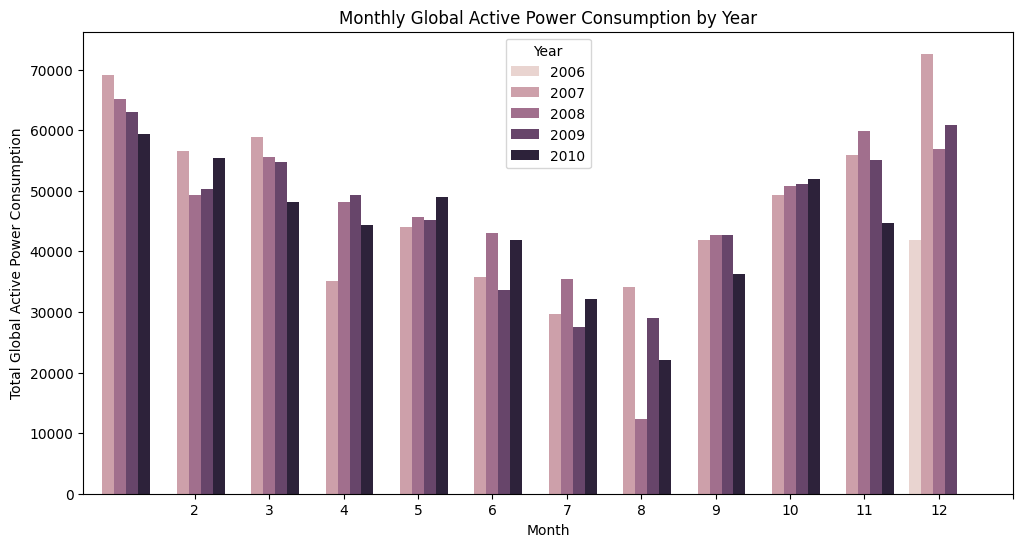

In [19]:
# Create the bar plot
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
sns.barplot(x='Month', y='Global_active_power', hue='Year', data=monthly_consumption)
plt.xlabel('Month')
plt.ylabel('Total Global Active Power Consumption')
plt.title('Monthly Global Active Power Consumption by Year')
plt.xticks(range(1, 13))
plt.legend(title='Year')
plt.show()


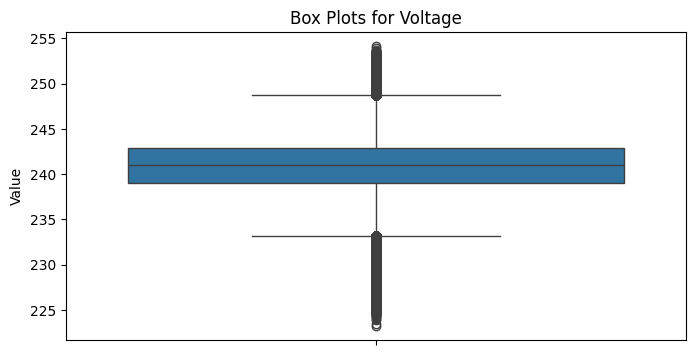

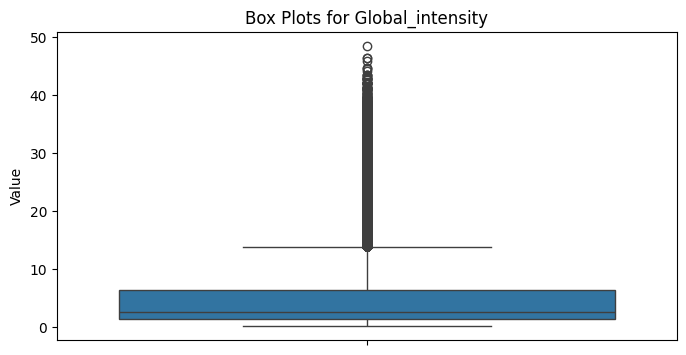

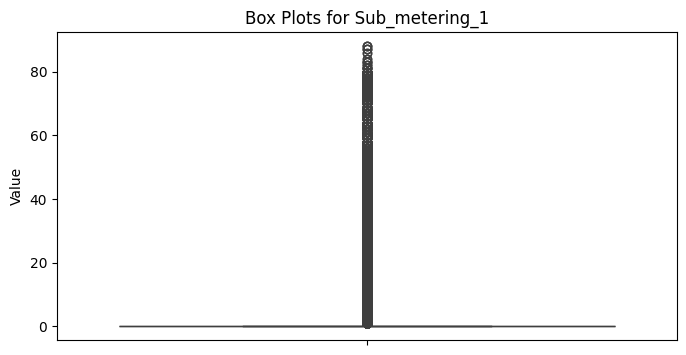

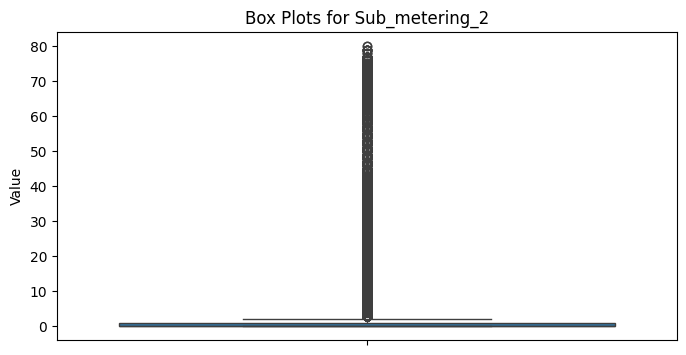

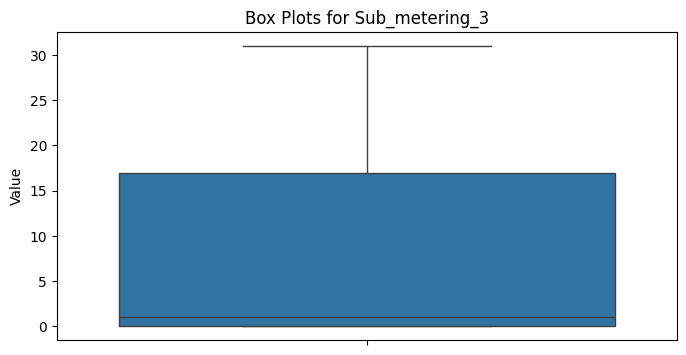

In [20]:
# create box plot for Voltage	Global_intensity	Sub_metering_1	Sub_metering_2	Sub_metering_3 to find outliers
def boxplot(columns_to_plot):
  import matplotlib.pyplot as plt
  plt.figure(figsize=(8, 4))
  sns.boxplot(data=data[columns_to_plot])
  plt.title(f"Box Plots for {columns_to_plot}")
  plt.ylabel('Value')
  plt.xticks(rotation=45)
  plt.show()

for column in ['Voltage','Global_intensity','Sub_metering_1','Sub_metering_2','Sub_metering_3']:
  boxplot(column)



In [21]:

#  Find outliers

def find_outliers_iqr(data, column):

  Q1 = data[column].quantile(0.25)
  Q3 = data[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)][column].tolist()
  return outliers

Global_active_power_outliers = find_outliers_iqr(data, 'Global_active_power')
voltage_outliers = find_outliers_iqr(data, 'Voltage')
Global_intensity_outliers = find_outliers_iqr(data, 'Global_intensity')
Sub_metering_1_outliers = find_outliers_iqr(data, 'Sub_metering_1')
Sub_metering_2_outliers = find_outliers_iqr(data, 'Sub_metering_2')
Sub_metering_3_outliers = find_outliers_iqr(data, 'Sub_metering_3')

#print("Outliers in Voltage:", voltage_outliers)
print("Number of outliers in Global Active Power:", len(Global_active_power_outliers))

#print("Outliers in Voltage:", voltage_outliers)
print("Number of outliers in Voltage:", len(voltage_outliers))

#print("Outliers in Global_intensity:", Global_intensity_outliers)
print("Number of outliers in Global_intensity:", len(Global_intensity_outliers))

#print("Outliers in Sub_metering_1:", Sub_metering_1_outliers)
print("Number of outliers in Sub_metering_1:", len(Sub_metering_1_outliers))

#print("Outliers in Sub_metering_2:", Sub_metering_2_outliers)
print("Number of outliers in Sub_metering_2:", len(Sub_metering_2_outliers))

#print("Outliers in Sub_metering_3:", Sub_metering_3_outliers)
print("Number of outliers in Sub_metering_3:", len(Sub_metering_3_outliers))

Number of outliers in Global Active Power: 94907
Number of outliers in Voltage: 51067
Number of outliers in Global_intensity: 100961
Number of outliers in Sub_metering_1: 169105
Number of outliers in Sub_metering_2: 77151
Number of outliers in Sub_metering_3: 0


In [22]:
# Find outliers and rectified

def replace_outliers_with_mean(data, column):

  Q1 = data[column].quantile(0.25)
  Q3 = data[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  mean_value = data[column].mean()
  data.loc[(data[column] < lower_bound) | (data[column] > upper_bound), column] = mean_value
  return data

data= replace_outliers_with_mean(data, 'Global_active_power')
data = replace_outliers_with_mean(data, 'Voltage')
data = replace_outliers_with_mean(data, 'Global_intensity')
data = replace_outliers_with_mean(data, 'Sub_metering_1')
data = replace_outliers_with_mean(data, 'Sub_metering_2')
data = replace_outliers_with_mean(data, 'Sub_metering_3')


# Check if outliers are still present after replacement
Global_active_power_outliers_after = find_outliers_iqr(data, 'Global_active_power')
voltage_outliers_after = find_outliers_iqr(data, 'Voltage')
Global_intensity_outliers_after = find_outliers_iqr(data, 'Global_intensity')
Sub_metering_1_outliers_after = find_outliers_iqr(data, 'Sub_metering_1')
Sub_metering_2_outliers_after = find_outliers_iqr(data, 'Sub_metering_2')
Sub_metering_3_outliers_after = find_outliers_iqr(data, 'Sub_metering_3')


print("Number of outliers in Global_active_power after replacement:",len(Global_active_power_outliers_after))
print("Number of outliers in Voltage after replacement:", len(voltage_outliers_after))
print("Number of outliers in Global_intensity after replacement:", len(Global_intensity_outliers_after))
print("Number of outliers in Sub_metering_1 after replacement:", len(Sub_metering_1_outliers_after))
print("Number of outliers in Sub_metering_2 after replacement:", len(Sub_metering_2_outliers_after))
print("Number of outliers in Sub_metering_3 after replacement:", len(Sub_metering_3_outliers_after))


Number of outliers in Global_active_power after replacement: 18722
Number of outliers in Voltage after replacement: 19059
Number of outliers in Global_intensity after replacement: 19925
Number of outliers in Sub_metering_1 after replacement: 169105
Number of outliers in Sub_metering_2 after replacement: 0
Number of outliers in Sub_metering_3 after replacement: 0


In [23]:
Sub_metering_1_outliers
data['Sub_metering_1'].mean()
max(Sub_metering_1_outliers)
min(Sub_metering_1_outliers)
print((data['Sub_metering_1']==0).sum())
print((data['Sub_metering_1']!=0).sum())
##There are 90% of data in sub_metering_1 is Zero

1880175
169105


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Global_active_power,1.000000,0.199569,-0.298323,0.985434,0.249862,0.081575,0.690966
Global_reactive_power,0.199569,1.000000,-0.108793,0.221610,0.150714,0.408358,0.089617
Voltage,-0.298323,-0.108793,1.000000,-0.305229,-0.164777,-0.068183,-0.256095
Global_intensity,0.985434,0.221610,-0.305229,1.000000,0.248882,0.091491,0.682065
Sub_metering_1,0.249862,0.150714,-0.164777,0.248882,1.000000,0.043560,0.180810
Sub_metering_2,0.081575,0.408358,-0.068183,0.091491,0.043560,1.000000,0.025351
Sub_metering_3,0.690966,0.089617,-0.256095,0.682065,0.180810,0.025351,1.000000


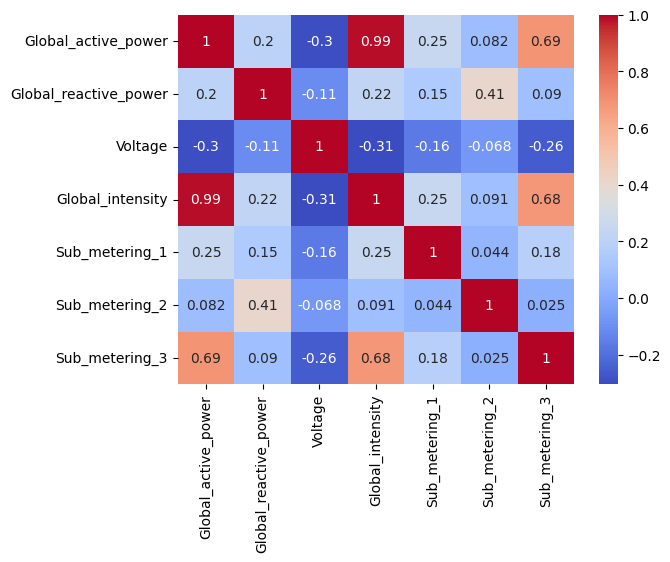

In [25]:
# correlation matrix
correlation_matrix = data.select_dtypes(include=['number']).drop(columns=['Month','Year'],errors='ignore').corr()
display(correlation_matrix)
# Heatmap visualization
import seaborn as sns
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.show()


Global_active_power≈

Voltage×Global_intensity/1000


## DATA SET 1 ##

In [26]:
#define features and targets
X=data['Global_intensity']
y=data['Global_active_power']


In [27]:
# Train-Test Split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [28]:
# Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.values.reshape(-1, 1)) # Reshape X_train to 2D, remove .values
X_test = scaler.transform(X_test.values.reshape(-1, 1)) # Reshape X_test to 2D

In [29]:
#import algorithms
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor


In [30]:
# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=50, n_jobs=-1, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=50, learning_rate=0.1, random_state=42),
    "Neural Network": MLPRegressor(hidden_layer_sizes=(30,30), max_iter=300, early_stopping=True, random_state=42)
}

In [33]:
# Dictionary to store results
results = []
import pickle as pkl

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Predict on test data
    pkl.dump(model, open(f'{name}.pkl', 'wb')) # Sava as pickle file

    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    # Store results
    results.append({"Model": name, "MAE": mae, "RMSE": rmse, "R²": r2})

# Convert results to DataFrame
results_df = pd.DataFrame(results).sort_values(by="R²", ascending=True)

# Display results
print(results_df)


               Model       MAE      RMSE        R²
0  Linear Regression  0.036405  0.129958  0.970940
3     Neural Network  0.038148  0.126072  0.972652
2  Gradient Boosting  0.039190  0.125686  0.972819
1      Random Forest  0.038788  0.125473  0.972911


In [38]:
# Test the models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=50, n_jobs=-1, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=50, learning_rate=0.1, random_state=42),
    "Neural Network": MLPRegressor(hidden_layer_sizes=(30,30), max_iter=300, early_stopping=True, random_state=42)
}
gi=float(input("Enter the global intensity:"))

predict = scaler.transform(np.array([[gi]]))
for name,models in models.items():
  model=pkl.load(open(f'{name}.pkl','rb'))
  gap=model.predict(predict)
  print(f'The predicted global active power using {name} is {gap}')

Enter the global intensity:4
The predicted global active power using Linear Regression is [0.95021693]
The predicted global active power using Random Forest is [0.93007062]
The predicted global active power using Gradient Boosting is [0.92916538]
The predicted global active power using Neural Network is [0.93016189]


## DATA SET 2 ##

In [40]:
#define new features and targets
x_new=data[['Global_intensity','Sub_metering_2','Sub_metering_3']]
y_new=data['Global_active_power']

In [41]:
# Train-Test Split

from sklearn.model_selection import train_test_split

x_new_train, x_new_test, y_new_train, y_new_test = train_test_split(x_new, y_new, test_size=0.3, random_state=42)

In [42]:
# Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_new_train = scaler.fit_transform(x_new_train)
x_new_test = scaler.transform(x_new_test)

In [43]:
#import algorithms
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor

In [45]:
# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=50, n_jobs=-1, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=50, learning_rate=0.1, random_state=42),
    "Neural Network": MLPRegressor(hidden_layer_sizes=(30,30), max_iter=300, early_stopping=True, random_state=42)
}
# Dictionary to store results
results = []
import pickle as pkl

# Train and evaluate each model
for name, model in models.items():
    model.fit(x_new_train, y_new_train)  # Train the model
    pkl.dump(model, open(f'{name}_v2.pkl', 'wb'))
    y_new_pred = model.predict(x_new_test)  # Predict on test data

    # Calculate metrics
    mae = mean_absolute_error(y_new_test, y_new_pred)
    rmse = np.sqrt(mean_squared_error(y_new_test, y_new_pred))
    r2 = r2_score(y_new_test, y_new_pred)

    # Store results
    results.append({"Model": name, "MAE": mae, "RMSE": rmse, "R²": r2})

# Convert results to DataFrame
results_df = pd.DataFrame(results).sort_values(by="R²", ascending=True)

# Display results
print(results_df)

               Model       MAE      RMSE        R²
0  Linear Regression  0.036087  0.128371  0.971646
2  Gradient Boosting  0.037902  0.125273  0.972997
3     Neural Network  0.037312  0.125190  0.973033
1      Random Forest  0.036261  0.124128  0.973489


In [47]:
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=50, n_jobs=-1, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=50, learning_rate=0.1, random_state=42),
    "Neural Network": MLPRegressor(hidden_layer_sizes=(30,30), max_iter=300, early_stopping=True, random_state=42)
}
gi=float(input("Enter the global intensity:"))
sm2=float(input("Enter the sub metering 2:"))
sm3=float(input("Enter the sub metering 3:"))

predict = scaler.transform(np.array([[gi,sm2,sm3]]))
for name,models in models.items():
  model=pkl.load(open(f'{name}_v2.pkl','rb'))
  gap=model.predict(predict)
  print(f'The predicted global active power using {name} is {gap}')


Enter the global intensity:4.62
Enter the sub metering 2:1
Enter the sub metering 3:7
The predicted global active power using Linear Regression is [1.09177954]
The predicted global active power using Random Forest is [1.31521189]
The predicted global active power using Gradient Boosting is [1.18764448]
The predicted global active power using Neural Network is [1.16041495]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


## DATA SET 3 ##

In [50]:
data2=data.groupby('Date')[['Global_active_power','Global_intensity','Sub_metering_2','Sub_metering_3']].sum()
data2.head(5)

,Global_active_power,Global_intensity,Sub_metering_2,Sub_metering_3
Date,,,,
2006-12-16,771.549176,2968.185306,184.567439,4926.0
2006-12-17,2539.692361,10400.388332,770.494276,13341.0
2006-12-18,1955.937353,7899.758877,502.672717,14018.0
2006-12-19,1350.336508,5719.698338,844.003351,6197.0
2006-12-20,1634.464773,6664.729123,493.583077,14063.0


In [51]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1433 entries, 2006-12-16 to 2010-11-26
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Global_active_power  1433 non-null   float64
 1   Global_intensity     1433 non-null   float64
 2   Sub_metering_2       1433 non-null   float64
 3   Sub_metering_3       1433 non-null   float64
dtypes: float64(4)
memory usage: 56.0 KB


In [52]:
data2.describe()

,Global_active_power,Global_intensity,Sub_metering_2,Sub_metering_3
count,1433.000000,1433.000000,1433.000000,1433.000000
mean,1348.449844,5676.714171,553.074748,9235.985345
std,427.024076,1724.323851,230.130406,3729.017334
min,14.218000,60.200000,0.000000,0.000000
25%,1090.424301,4668.483278,400.776319,6653.000000
50%,1378.959786,5790.865559,533.298520,9273.000000
75%,1625.443428,6746.731782,659.000000,11716.000000
max,2947.481347,12197.816091,2151.000000,23743.000000


In [53]:
data2.isnull().sum()

,0
Global_active_power,0
Global_intensity,0
Sub_metering_2,0
Sub_metering_3,0


In [54]:
#define new features and targets based on date
x_new2=data2[['Global_intensity','Sub_metering_2','Sub_metering_3']]
y_new2=data2['Global_active_power']

In [55]:
 ##calculate outiler for data2

def find_outliers_iqr_df(data, column):

  Q1 = data[column].quantile(0.25)
  Q3 = data[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)][column].tolist()
  return outliers


# Find outliers in data2 for relevant columns
for column in ['Global_active_power', 'Global_intensity', 'Sub_metering_2', 'Sub_metering_3']:
  outliers = find_outliers_iqr_df(data2, column)
  #print(f"Outliers in {column}: {outliers}")
  print(f"Number of outliers in {column}: {len(outliers)}")



Number of outliers in Global_active_power: 38
Number of outliers in Global_intensity: 42
Number of outliers in Sub_metering_2: 49
Number of outliers in Sub_metering_3: 8


In [56]:
# Find outliers and rectified

def replace_outliers_with_mean(data, column):
  Q1 = data[column].quantile(0.25)
  Q3 = data[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  mean_value = data[column].mean()
  data.loc[(data[column] < lower_bound) | (data[column] > upper_bound), column] = mean_value
  return data

# Replace outliers in 'Voltage' column with the mean
data2 = replace_outliers_with_mean(data2, 'Global_active_power')
data2 = replace_outliers_with_mean(data2, 'Global_intensity')
data2 = replace_outliers_with_mean(data2, 'Sub_metering_2')
data2 = replace_outliers_with_mean(data2, 'Sub_metering_3')


# Check if outliers are still present after replacement
Global_active_power_outliers_after = find_outliers_iqr(data2, 'Global_active_power')
Global_intensity_outliers_after = find_outliers_iqr(data2, 'Global_intensity')
Sub_metering_2_outliers_after = find_outliers_iqr(data2, 'Sub_metering_2')
Sub_metering_3_outliers_after = find_outliers_iqr(data2, 'Sub_metering_3')


print("Number of outliers in Global_active_power after replacement:",len(Global_active_power_outliers_after))
print("Number of outliers in Global_intensity after replacement:", len(Global_intensity_outliers_after))
print("Number of outliers in Sub_metering_2 after replacement:", len(Sub_metering_2_outliers_after))
print("Number of outliers in Sub_metering_3 after replacement:", len(Sub_metering_3_outliers_after))


Number of outliers in Global_active_power after replacement: 10
Number of outliers in Global_intensity after replacement: 11
Number of outliers in Sub_metering_2 after replacement: 12
Number of outliers in Sub_metering_3 after replacement: 0


In [57]:
# Train-Test Split

from sklearn.model_selection import train_test_split

x_new2_train, x_new2_test, y_new2_train, y_new2_test = train_test_split(x_new2, y_new2, test_size=0.3, random_state=42)

In [58]:
# Standardization

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_new2_train = scaler.fit_transform(x_new2_train)
x_new2_test = scaler.transform(x_new2_test)

In [59]:
#import algorithms
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor

In [62]:
# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=50, n_jobs=-1, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=50, learning_rate=0.1, random_state=42),
    "Neural Network": MLPRegressor(hidden_layer_sizes=(30,30), max_iter=1000, early_stopping=True, random_state=42)
}

In [67]:
# Dictionary to store results
results = []

# Train and evaluate each model
for name, model in models.items():
    model.fit(x_new2_train, y_new2_train)  # Train the model
    pkl.dump(model, open(f'{name}_v3.pkl', 'wb'))
    y_new2_pred = model.predict(x_new2_test)  # Predict on test data

    # Calculate metrics
    mae = mean_absolute_error(y_new2_test, y_new2_pred)
    rmse = np.sqrt(mean_squared_error(y_new2_test, y_new2_pred))
    r2 = r2_score(y_new2_test, y_new2_pred)

    # Store results
    results.append({"Model": name, "MAE": mae, "RMSE": rmse, "R²": r2})

# Convert results to DataFrame
results_df = pd.DataFrame(results).sort_values(by="R²", ascending=True)

# Display results
print(results_df)

               Model        MAE        RMSE        R²
0  Linear Regression  91.813040  171.269613  0.801642
3     Neural Network  67.793324  146.313728  0.855237
2  Gradient Boosting  16.754864   23.428528  0.996288
1      Random Forest  16.172272   22.662054  0.996527


In [65]:

from sklearn.model_selection import GridSearchCV
best_models={}

# Define parameter grids for each model
param_grids = {
    "Linear Regression": {
        'fit_intercept': [True, False],
        'positive': [True, False]
    },
    "Random Forest": {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 5, 10],
        'min_samples_split': [2, 5, 10]
    },
    "Gradient Boosting": {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.1, 0.05, 0.01],
        'max_depth': [3, 5, 7]
    },
    "Neural Network": {
        'hidden_layer_sizes': [(30, 30), (50, 50)],
        'activation': ['relu', 'tanh'],
        'alpha': [0.0001, 0.001, 0.01]
    }
}


# Perform hyperparameter tuning for each model
for name, model in models.items():
  grid_search = GridSearchCV(estimator=model, param_grid=param_grids[name], cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
  grid_search.fit(x_new2_train, y_new2_train)

  print(f"Best parameters for {name}: {grid_search.best_params_}")
  #print(f"Best score for {name}: {grid_search.best_score_}")


  # Replace the original model with the best model from the grid search
  best_models[name] = grid_search.best_estimator_



Best parameters for Linear Regression: {'fit_intercept': True, 'positive': False}
Best parameters for Random Forest: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 50}
Best parameters for Gradient Boosting: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}
Best parameters for Neural Network: {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (50, 50)}


In [66]:
best_models

{'Linear Regression': LinearRegression(),
 'Random Forest': RandomForestRegressor(min_samples_split=5, n_estimators=50, n_jobs=-1,
                       random_state=42),
 'Gradient Boosting': GradientBoostingRegressor(learning_rate=0.05, random_state=42),
 'Neural Network': MLPRegressor(alpha=0.01, early_stopping=True, hidden_layer_sizes=(50, 50),
              max_iter=1000, random_state=42)}

In [68]:
#fit the above best hyper parameter and run the model again

import pandas as pd
import numpy as np
# Dictionary to store results
results = []

# Train and evaluate each model with the best hyperparameters
for name, model in best_models.items():
    model.fit(x_new2_train, y_new2_train)  # Train the model
    pkl.dump(model, open(f'{name}_v3_tuned.pkl', 'wb'))
    y_new2_pred = model.predict(x_new2_test)  # Predict on test data

    # Calculate metrics
    mae = mean_absolute_error(y_new2_test, y_new2_pred)
    rmse = np.sqrt(mean_squared_error(y_new2_test, y_new2_pred))
    r2 = r2_score(y_new2_test, y_new2_pred)

    # Store results
    results.append({"Model": name, "MAE": mae, "RMSE": rmse, "R²": r2})

# Convert results to DataFrame
results_df = pd.DataFrame(results).sort_values(by="R²", ascending=True)

# Display results
print(results_df)



               Model        MAE        RMSE        R²
0  Linear Regression  91.813040  171.269613  0.801642
3     Neural Network  50.526741  126.747011  0.891366
2  Gradient Boosting  16.701983   23.571207  0.996243
1      Random Forest  16.049531   22.543236  0.996563


In [71]:

gi=float(input("Enter the global intensity:"))
sm2=float(input("Enter the sub metering 2:"))
sm3=float(input("Enter the sub metering 3:"))

predict = scaler.transform(np.array([[gi,sm2,sm3]]))
for name,models in best_models.items():
  model=pkl.load(open(f'{name}_v3_tuned.pkl','rb'))
  gap=model.predict(predict)
  print(f'The predicted global active power for the day using {name} is {gap}')

Enter the global intensity:2968.18
Enter the sub metering 2:184.56
Enter the sub metering 3:4926
The predicted global active power for the day using Linear Regression is [860.47053542]
The predicted global active power for the day using Random Forest is [744.00136103]
The predicted global active power for the day using Gradient Boosting is [726.15088119]
The predicted global active power for the day using Neural Network is [712.74155556]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
